In [241]:
# set up libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split

%matplotlib inline

In [209]:
# set up datasets
road_crash = pd.read_csv("data/ACT_Road_Crash_Data.csv")
speed_cameras = pd.read_csv("data/Traffic_speed_camera_locations.csv")

In [210]:
# remove all rows with Unknown or nan

road_crash = road_crash[road_crash.SUBURB_LOCATION.notnull()]
road_crash = road_crash.drop(road_crash[road_crash['LIGHTING_CONDITION'] == 'Unknown'].index)
road_crash = road_crash.drop(road_crash[road_crash['ROAD_CONDITION'] == 'Unknown'].index)
road_crash = road_crash.drop(road_crash[road_crash['WEATHER_CONDITION'] == 'Unknown'].index)

In [211]:
# remove unecessary columns

road_crash = road_crash.drop('LONGITUDE', axis=1)
road_crash = road_crash.drop('LATITUDE', axis=1)
road_crash = road_crash.drop('MIDBLOCK', axis=1)
road_crash = road_crash.drop('CRASH_DIRECTION', axis=1)
road_crash = road_crash.drop('CRASH_ID', axis=1)

In [212]:
# convert CRASH_DATE and CRASH_TIME to datetime
road_crash["CRASH_DATE"] = pd.to_datetime(road_crash["CRASH_DATE"], 
    format = "%d/%m/%Y", 
    errors = "coerce")
road_crash["CRASH_TIME"] = pd.to_datetime(road_crash["CRASH_TIME"], 
    format = "%H:%M", 
    errors = "coerce")

# extract month, dayofweek, and hour
# road_crash["CRASH_DATE_month"] = road_crash["CRASH_DATE"].dt.month
road_crash["CRASH_DATE_dayofweek"] = road_crash["CRASH_DATE"].dt.dayofweek
road_crash["CRASH_TIME_hour"] = road_crash["CRASH_TIME"].dt.hour

# drop CRASH_DATE and CRASH_TIME
road_crash = road_crash.drop('CRASH_DATE', axis=1)
road_crash = road_crash.drop('CRASH_TIME', axis=1)

In [213]:
road_crash

,SUBURB_LOCATION,INTERSECTION,CRASH_TYPE,CRASH_SEVERITY,LIGHTING_CONDITION,ROAD_CONDITION,WEATHER_CONDITION,Location,CRASH_DATE_dayofweek,CRASH_TIME_hour
0,KAMBAH,NO,Struck object (Off Road),Injury,Daylight,Good dry surface,Fine,"(-35.392006654135606, 149.05505612950844)",4,9
1,PHILLIP,YES,Struck pedestrian (On Road),Injury,Daylight,Good dry surface,Fine,"(-35.34892137433122, 149.0844465057644)",3,17
2,HALL,NO,Struck object (Off Road),Injury,Daylight,Good dry surface,Fine,"(-35.172862707340954, 149.0614313347401)",6,11
3,BELCONNEN,YES,Rear end collision,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.201315499751615, 149.09407196860244)",1,17
4,HARRISON,YES,Rear end collision,Injury,Daylight,Good dry surface,Fine,"(-35.19730828458103, 149.15639997910796)",3,14
...,...,...,...,...,...,...,...,...,...,...
71791,CRACE,NO,Other - Vehicle to Vehicle,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)",3,15
71792,RURAL - BELCONNEN,NO,Struck animal (not ridden On Road),Property Damage Only,Daylight,Good dry surface,Fine,"(-35.20863373403501, 149.06267307593114)",0,7
71793,RED HILL,NO,Other - Vehicle to Vehicle,Property Damage Only,Daylight,Good dry surface,Fine,"(-35.34137565927604, 149.1313181181877)",0,10
71794,GUNGAHLIN,YES,Rear end collision,Property Damage Only,Dark - good street lighting,Good dry surface,Fine,"(-35.182638434932166, 149.12926943569062)",2,17


In [214]:
# encoding categorical variables with one-hot encoding
road_crash = pd.get_dummies(road_crash, columns=["SUBURB_LOCATION", "CRASH_TYPE", "LIGHTING_CONDITION", "ROAD_CONDITION", "WEATHER_CONDITION"],)

# replace YES / NO values in INTERSECTION with 1 / 0
road_crash.INTERSECTION.replace(('YES', 'NO'), (1, 0), inplace=True)

In [215]:
road_crash

,INTERSECTION,CRASH_SEVERITY,Location,CRASH_DATE_dayofweek,CRASH_TIME_hour,SUBURB_LOCATION_ACTON,SUBURB_LOCATION_AINSLIE,SUBURB_LOCATION_AMAROO,SUBURB_LOCATION_ARANDA,SUBURB_LOCATION_BANKS,...,ROAD_CONDITION_Snow or ice,ROAD_CONDITION_Wet surface,WEATHER_CONDITION_Cloudy or Overcast,WEATHER_CONDITION_Fine,WEATHER_CONDITION_Fog,WEATHER_CONDITION_Heavy rain,WEATHER_CONDITION_Light rain,WEATHER_CONDITION_Other,WEATHER_CONDITION_Smoke or dust,WEATHER_CONDITION_Snow or sleet
0,0,Injury,"(-35.392006654135606, 149.05505612950844)",4,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,Injury,"(-35.34892137433122, 149.0844465057644)",3,17,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,Injury,"(-35.172862707340954, 149.0614313347401)",6,11,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,Property Damage Only,"(-35.201315499751615, 149.09407196860244)",1,17,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,Injury,"(-35.19730828458103, 149.15639997910796)",3,14,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71791,0,Property Damage Only,"(-35.20863373403501, 149.06267307593114)",3,15,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
71792,0,Property Damage Only,"(-35.20863373403501, 149.06267307593114)",0,7,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
71793,0,Property Damage Only,"(-35.34137565927604, 149.1313181181877)",0,10,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
71794,1,Property Damage Only,"(-35.182638434932166, 149.12926943569062)",2,17,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [216]:
# Convert a string to 2 floats for latitude and longitude pair
def convert_to_float(points):
    if(type(points) == float):
        return None
    points_list = points.replace('(', '').replace(')', '').split(', ')
    result = [float(i) for i in points_list]
    return result

# Find the closest camera and its distance from a "crash" point
def find_closest(crash):
    cameras = speed_cameras['Location']
    # Convert latitude and longitude of crash location to radians
    crash_lat, crash_lon = map(radians, crash)

    # Initialize variables for closest location and distance
    closest_location = None
    closest_distance = float('inf')

    # Iterate through each location
    for camera in cameras:
        # Convert latitude and longitude of camera to radians
        if(convert_to_float(camera) == None):
            continue
        camera_lat, camera_lon = map(radians, convert_to_float(camera))

        # Haversine formula to calculate distance between two points
        dlat = camera_lat - crash_lat
        dlon = camera_lon - crash_lon
        a = sin(dlat/2)**2 + cos(crash_lat) * cos(camera_lat) * sin(dlon/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        distance = 6371 * c  # Earth radius in kilometers

        # Update closest location and distance if current location is closer
        if distance < closest_distance:
            closest_location = camera
            closest_distance = distance

    return closest_distance

In [217]:
# Add column representing the closest distance to speed camera
road_crash["Location"] = road_crash["Location"].apply(convert_to_float)
road_crash["DISTANCE"] = road_crash["Location"].apply(find_closest)

In [218]:
# drop location
road_crash = road_crash.drop('Location', axis=1)

In [219]:
road_crash

,INTERSECTION,CRASH_SEVERITY,CRASH_DATE_dayofweek,CRASH_TIME_hour,SUBURB_LOCATION_ACTON,SUBURB_LOCATION_AINSLIE,SUBURB_LOCATION_AMAROO,SUBURB_LOCATION_ARANDA,SUBURB_LOCATION_BANKS,SUBURB_LOCATION_BARTON,...,ROAD_CONDITION_Wet surface,WEATHER_CONDITION_Cloudy or Overcast,WEATHER_CONDITION_Fine,WEATHER_CONDITION_Fog,WEATHER_CONDITION_Heavy rain,WEATHER_CONDITION_Light rain,WEATHER_CONDITION_Other,WEATHER_CONDITION_Smoke or dust,WEATHER_CONDITION_Snow or sleet,DISTANCE
0,0,Injury,4,9,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.226802
1,1,Injury,3,17,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.078971
2,0,Injury,6,11,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.234320
3,1,Property Damage Only,1,17,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.274673
4,1,Injury,3,14,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.289336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71791,0,Property Damage Only,3,15,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.242169
71792,0,Property Damage Only,0,7,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.242169
71793,0,Property Damage Only,0,10,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.290127
71794,1,Property Damage Only,2,17,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.078887


In [220]:
road_crash["DISTANCE"].describe()

count    71714.000000
mean         0.302726
std          0.704605
min          0.001447
25%          0.137486
50%          0.234783
75%          0.352587
max         37.476997
Name: DISTANCE, dtype: float64

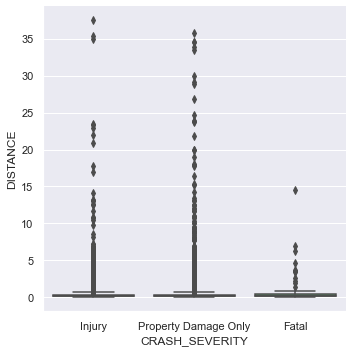

In [221]:
sns.catplot(data=road_crash, y="DISTANCE", x="CRASH_SEVERITY", kind="box")

In [222]:
count = 0
for x in road_crash["DISTANCE"]:
    if x > 1:
        count+=1
count

1407

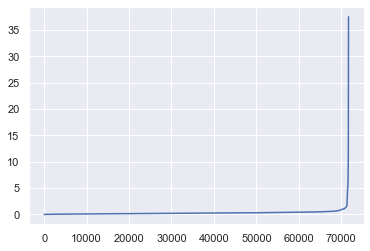

In [223]:
dist = road_crash["DISTANCE"].to_numpy()
dist = np.sort(dist)
plt.plot(dist)

In [224]:
(71714 - 1407) / 71714

0.9803803999219121

In [225]:
count = 0
for x in road_crash["DISTANCE"]:
    if x > 0.5:
        count+=1
count

6724

In [226]:
(71714 - 6724) / 71714

0.9062386702735867

In [227]:
# cap distance to 1 km
road_crash['DISTANCE'] = road_crash['DISTANCE'].clip(upper=1)

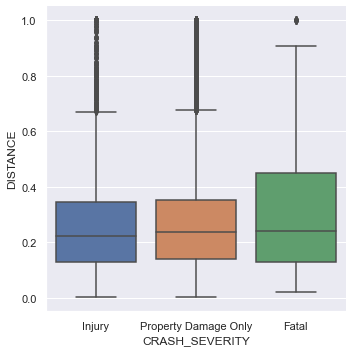

In [228]:
sns.catplot(data=road_crash, y="DISTANCE", x="CRASH_SEVERITY", kind="box")

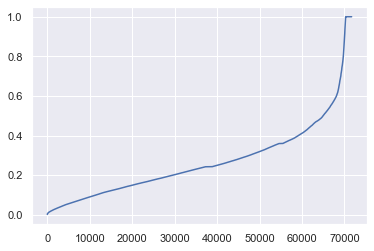

In [229]:
dist = road_crash["DISTANCE"].to_numpy()
dist = np.sort(dist)
plt.plot(dist)

In [230]:
# Set CRASH_TYPE as the target and the other columns as features
# X: feature matrix, y: target variable
X = road_crash.drop('CRASH_SEVERITY', axis=1)
y = road_crash['CRASH_SEVERITY']

# Split the data into train/validation and test sets (80/20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Split the train/valdation set into train and validation sets (60/40 split) 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Print the shapes of the resulting sets
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

# Get amount of fatal in train, validation and test sets
cnt_train = 0
cnt_val = 0
cnt_test = 0
for i in y_train:
    if i == 'Fatal':
        cnt_train += 1
for i in y_val:
    if i == 'Fatal':
        cnt_val += 1
for i in y_test:
    if i == 'Fatal':
        cnt_test += 1

print(f"Train Fatal Count: {cnt_train}")
print(f"Validation Fatal Count: {cnt_val}")
print(f"Test Fatal Count: {cnt_test}")

Train set shape: (43028, 178)
Validation set shape: (14343, 178)
Test set shape: (14343, 178)
Train Fatal Count: 49
Validation Fatal Count: 16
Test Fatal Count: 16


In [240]:
# save x & y train, validation, and test sets as csv files
X_train.to_csv("X_train.csv", encoding='utf-8', index=False)
X_val.to_csv("X_val.csv", encoding='utf-8', index=False)
X_test.to_csv("X_test.csv", encoding='utf-8', index=False)
y_train.to_csv("y_train.csv", encoding='utf-8', index=False)
y_val.to_csv("y_val.csv", encoding='utf-8', index=False)
y_test.to_csv("y_test.csv", encoding='utf-8', index=False)

In [245]:
y_train.replace(('Injury', 'Fatal'), ('Injury or Fatal', 'Injury or Fatal'), inplace=True)

In [249]:
y_test.replace(('Injury', 'Fatal'), ('Injury or Fatal', 'Injury or Fatal'), inplace=True)

In [252]:
y_val.replace(('Injury', 'Fatal'), ('Injury or Fatal', 'Injury or Fatal'), inplace=True)

In [255]:
# save binary y datasets
y_train.to_csv("y_train_binary.csv", encoding='utf-8', index=False)
y_val.to_csv("y_val_binary.csv", encoding='utf-8', index=False)
y_test.to_csv("y_test_binary.csv", encoding='utf-8', index=False)